## Observations and Insights 

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
totalmice = len(merge_df["Mouse ID"].value_counts())

totalmice


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#clean_data_df = merge_df.drop_duplicates(
    #subset = ['Mouse ID', 'Timepoint'],
    #keep = 'last').reset_index(drop = True)
#--------------------------------------------------------------------------------------------------------------

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [202]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_data_df
#----------------------------------------------------------------------------------

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
#clean_totalmice = len(clean_data_df["Mouse ID"].value_counts())

#clean_totalmice
#-----------------------------------------------------------------------

# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#mean values
mean_value_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#mean_value_df

#median values
median_value_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#median_value_df

#variance values
variance_value_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#variance_value_df

#standard deviation (stdv) values 
stdv_value_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#stdv_value_df

#standard error of the mean (SEM) values
sem_value_df = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#sem_value_df

# Assemble the resulting series into a single summary dataframe.
total_summary_df = pd.DataFrame({"Mean": mean_value_df, "Median": median_value_df, "Variance": variance_value_df, 
                                 "Standard Deviation": sem_value_df, "SEM": sem_value_df})


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
total_summary_df

# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111,0.573111


## Bar and Pie Charts

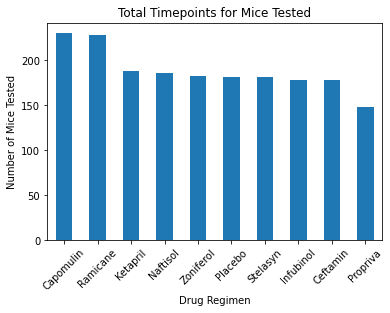

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#regimen = clean_data_df["Drug Regimen"].value_counts()
#timepoints = clean_data_df["Timepoint"].count()

#regimen_and_timepoints = regimen.add(timepoints, fill_value=0)

#regimen_and_timepoints.plot(kind="bar", figsize=(8,6), facecolor="red")
#-----------------------------------------------------------------------------------------------------------------------

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = clean_data_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("Number of Mice Tested")
plt.title("Total Timepoints for Mice Tested")
plt.show()

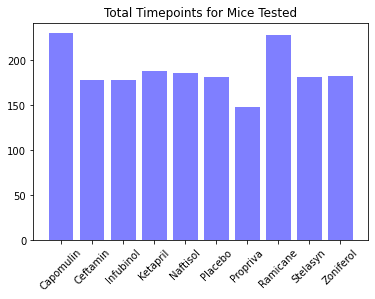

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#grouping by player
mice_group = clean_data_df.groupby("Drug Regimen")
#print(mice_group)
#regimen totals
regimen_totals_df = mice_group["Timepoint"].count()
#regimen_totals_df.shape

#create list for y-axis
py_y_axis = list(regimen_totals_df)
#py_y_axis

#extract info for x-axis
py_x_data = regimen_totals_df.reset_index()
#py_x_data

#create list for x-axis
py_x_data_list = list(py_x_data["Drug Regimen"])
#py_x_data_list

#create an array to give a numeric value for the x axis data
py_x_axis = np.arange(len(py_x_data_list))

#create graph
plt.bar(py_x_axis, py_y_axis, color='b', alpha=0.5, align="center")

#add labels to the x axis
tick_locations = [value for value in py_x_axis]
plt.xticks(tick_locations, py_x_data_list)
plt.xticks(rotation=45)
plt.title("Total Timepoints for Mice Tested")

plt.show()

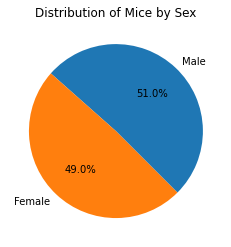

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#group by gender
gender_df = clean_data_df["Sex"].value_counts()
#gender_df.head()

#obtaining gender totals
#gender_df = gender_df[["Sex","Mouse ID"]]
#gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
#gender_df.head()

#pie graph
gender_df.plot(kind="pie", y='Count', title="Distribution of Mice by Sex", startangle=315, autopct = "%1.1f%%")

plt. ylabel("")
plt.show()


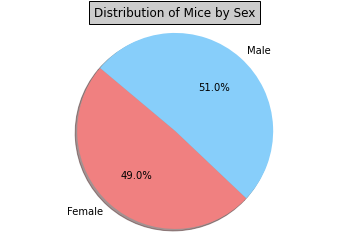

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#group by gender
gender_df = (clean_data_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

#obtaining gender totals
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

#creating x and y axis
labels = gender_df["Sex"]
size = gender_df["Count"]

#visual
colors = ["lightcoral", "lightskyblue"]

#creating pie graph
plt.pie(size, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Distribution of Mice by Sex", bbox={'facecolor':'0.8', 'pad':5})

#displaying pie graph
plt.show()

## Quartiles, Outliers and Boxplots

In [205]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#-----------------------------------------------------------------------------------------------------------------
#version 1
#regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#regimen_df = clean_data_df[clean_data_df["Drug Regimen"].isin(regimen)]
#random = []
#regimen_df

#select_regimen = regimen_df.groupby(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])
#select_regimen = select_regimen["Timepoint"]
#select_regimen = select_regimen.agg([("Timepoint", "last")])

#pd.set_option('display.max_rows', None)

#print(select_regimen)

#-----------------------------------------------------------------------------------------------------------
#version 2
#regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#regimen_df = clean_data_df[clean_data_df["Drug Regimen"].isin(regimen)]
#random = []
#mouse_groups = regimen_df.loc[regimen_df["Drug Regimen"].isin(regimen)].groupby(["Mouse ID"])[["Timepoint"]].max()
#mouse_groups.reset_index(inplace=True)
#mouse_groups

#print(mouse_groups)
#max_timepoint = mouse_groups["Tumor Volume (mm3)"]
#max_timepoint = mouse_groups["Timepoint"].max()
#max_timepoint.head()

#pd.set_option('display.max_rows', None)

#print(max_timepoint)



#select_regimen = mouse_groups.loc[clean_data_df["Drug Regimen"]=="Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#select_regimen


#df_info_merge = pd.merge(regimen_df, mouse_groups, on=['Mouse ID', 'Timepoint'], how='inner')
#df_info_merge = df_info_merge.pop("Drug Regimen")
#df_info_merge = pd.DataFrame({"Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"})
#df_info_merge

#-----------------------------------------------------------------------------------------------------------------------
#version 3
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen_df = clean_data_df[clean_data_df["Drug Regimen"].isin(regimen)]
max_timepoint_df = pd.DataFrame(regimen_df.groupby(["Mouse ID"])["Timepoint"].max())
max_timepoint_df

merge_info_df = pd.merge(regimen_df, max_timepoint_df, on=["Mouse ID", "Timepoint"], how="inner")
merge_info_df = df_info_merge.drop(["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"], axis=1)
#pd.set_option('display.max_rows', None)
merge_info_df.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,22.050126
1,s185,Capomulin,23.343598
2,x401,Capomulin,28.484033
3,m601,Capomulin,28.430964
4,g791,Ramicane,29.128472


In [206]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. (for loop)
for drug in regimen:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = merge_info_df.loc[merge_info_df["Drug Regimen"]==drug]
    drug_volume = drug_df["Tumor Volume (mm3)"]

    
    # add subset 
    tumor_volume.append(drug_volume)
    
    # Determine outliers using upper and lower bounds
    

In [207]:
tumor_volume

[1     23.343598
 2     28.484033
 3     28.430964
 6     30.485985
 10    31.023923
 12    31.896238
 13    32.377357
 14    33.329098
 16    34.455298
 20    37.311846
 22    36.041047
 24    37.074024
 28    38.846876
 30    38.939633
 31    38.982878
 32    38.753265
 34    38.125164
 35    39.952347
 36    40.658124
 37    40.159220
 38    40.728578
 39    41.483008
 40    41.581521
 45    47.685963
 82    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 0     22.050126
 4     29.128472
 5     30.276232
 7     30.564625
 8     30.638696
 9     31.560470
 11    31.095335
 15    33.397653
 17    32.978522
 18    33.562402
 19    36.134852
 21    38.810366
 23    37.225650
 25    36.374510
 26    36.561652
 27    37.311236
 29    38.342008
 33    38.407618
 41    40.659006
 42    40.667713
 43    45.220869
 44    43.047543
 46    43.419381
 47    43.166373
 48    44.183451
 Name: Tumor Volume (mm3), dtype: float64,
 49    67.973419
 50    65.525743
 52    57.031862
 53    66.083

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

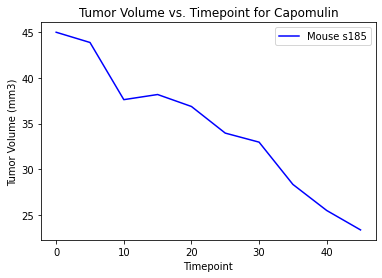

In [52]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#regimen_sort = clean_data_df.loc[clean_data_df["Drug Regimen"]=="Capomulin"]
#regimen_sort

mouse_identification = regimen_sort.loc[clean_data_df["Mouse ID"]=="s185"]
mouse_identification

x_line = mouse_identification["Timepoint"]
y_line = mouse_identification["Tumor Volume (mm3)"]

line_graph, = plt.plot(x_line, y_line, color="blue", label="Mouse s185")
plt.title("Tumor Volume vs. Timepoint for Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles=[line_graph], loc="best")
plt.show()
 


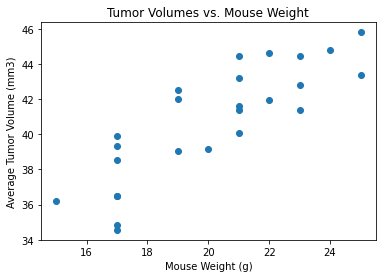

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
regimen_sort = clean_data_df.loc[clean_data_df["Drug Regimen"]=="Capomulin"]
regimen_sort

mice_avgs = regimen_sort.groupby(["Mouse ID"]).mean()
mice_avgs

plt.scatter(mice_avgs["Weight (g)"], mice_avgs["Tumor Volume (mm3)"])
plt.title("Tumor Volumes vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

#capomulin = capomulin.loc[regimen_sort['Capomulin']]
#capomulin.head()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84.


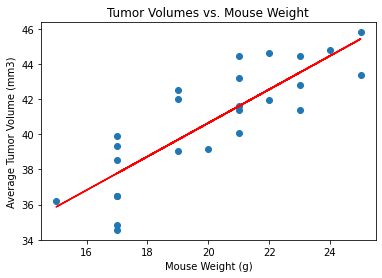

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(mice_avgs["Weight (g)"], mice_avgs["Tumor Volume (mm3)"])[0],2)
print(f'The correlation between mouse weight and tumor volume is {correlation}.')

lin_regre = st.linregress(mice_avgs["Weight (g)"], mice_avgs["Tumor Volume (mm3)"])
lin_regre

yvalues = mice_avgs["Weight (g)"] * lin_regre[0] + lin_regre[1]
yvalues
plt.scatter(mice_avgs["Weight (g)"], mice_avgs["Tumor Volume (mm3)"])
plt.plot(mice_avgs["Weight (g)"], yvalues, color="r")
plt.title("Tumor Volumes vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()